In [1]:
import pandas as pd
import numpy as np
datadict = {
'F1': np.random.rand(100),
'F2': np.random.randint(1, 100, size=100),
'F3': np.random.randn(100),
'F4': np.random.uniform(0, 10, size=100),
'F5': np.random.normal(50, 10, size=100),
'F6': np.random.exponential( 5, size=100 ),
}
data = pd.DataFrame( datadict )
X_train = data [ :75 ]
X_test = data [ 75: ]

In [2]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      75 non-null     float64
 1   F2      75 non-null     int64  
 2   F3      75 non-null     float64
 3   F4      75 non-null     float64
 4   F5      75 non-null     float64
 5   F6      75 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.6 KB


In [3]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit( X_train )
X_train1 = scaler1.transform( X_train )
X_test1 = scaler1.transform( X_test )
print( X_train1.mean( axis=0 ))
print( X_test1.mean( axis=0 ))
print( X_train1.std( axis=0 ))
print( X_test1.std( axis=0 ))

[-1.80596279e-16 -6.51330841e-17  8.88178420e-18 -8.88178420e-18
 -4.61482704e-16  2.22044605e-16]
[ 0.03240365  0.04095946 -0.41572233 -0.32296827 -0.06450989  0.16403171]
[1. 1. 1. 1. 1. 1.]
[1.00166847 1.18951666 0.88446561 0.8704763  1.05118423 1.49122801]


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit( X_train )
X_train2 = scaler2.transform( X_train )
X_test2 = scaler2.transform( X_test )
print( X_train2.max( axis=0 ))
print( X_test2.max( axis=0 ))
print( X_train2.min( axis=0 ))
print( X_test2.min( axis=0 ))

[1. 1. 1. 1. 1. 1.]
[0.99839322 1.01041667 0.82712612 1.01904853 0.80511329 1.15182646]
[0. 0. 0. 0. 0. 0.]
[ 0.02831038 -0.01041667  0.13767416  0.10942018 -0.07106389  0.01161995]


In [5]:
datadict2 = {
'F1': np.random.gamma(2, 2, 1000),
'F2': np.random.normal(0, 1, 1000),
'F3': np.random.uniform(0, 1, 1000)
}
data2 = pd.DataFrame(datadict2)

(array([ 7.,  7.,  7., 16., 28., 17., 27., 38., 47., 49., 55., 60., 52.,
        62., 67., 49., 75., 63., 56., 47., 38., 35., 34., 17., 17.,  9.,
         9.,  4.,  2.,  6.]),
 array([-2.46637915, -2.29432606, -2.12227298, -1.95021989, -1.7781668 ,
        -1.60611372, -1.43406063, -1.26200754, -1.08995445, -0.91790137,
        -0.74584828, -0.57379519, -0.40174211, -0.22968902, -0.05763593,
         0.11441715,  0.28647024,  0.45852333,  0.63057642,  0.8026295 ,
         0.97468259,  1.14673568,  1.31878876,  1.49084185,  1.66289494,
         1.83494803,  2.00700111,  2.1790542 ,  2.35110729,  2.52316037,
         2.69521346]),
 <BarContainer object of 30 artists>)

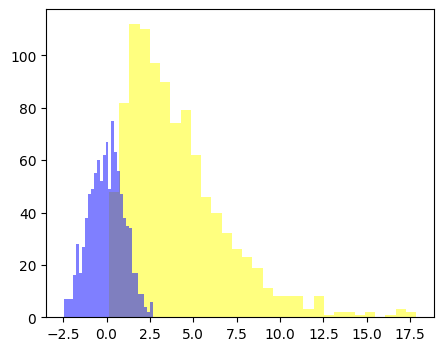

In [6]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer ( method ='yeo-johnson' )
pt.fit( data2 )
data2tr = pt.transform( data2 )
import matplotlib.pyplot as plt
plt.figure( figsize = (5, 4) )
plt.hist( data2[ 'F1' ], bins=30, color='yellow', alpha=0.5 )
plt.hist( data2tr[ :, 0 ], bins=30, color='blue', alpha=0.5)

(array([48., 60., 82., 80., 86., 71., 67., 64., 61., 62., 48., 43., 33.,
        31., 26., 19., 21., 16., 15., 11.,  8.,  6.,  4., 12.,  1.,  3.,
         8.,  0.,  2., 12.]),
 array([ 0.29377472,  0.7409125 ,  1.18805027,  1.63518805,  2.08232582,
         2.5294636 ,  2.97660138,  3.42373915,  3.87087693,  4.3180147 ,
         4.76515248,  5.21229025,  5.65942803,  6.10656581,  6.55370358,
         7.00084136,  7.44797913,  7.89511691,  8.34225468,  8.78939246,
         9.23653024,  9.68366801, 10.13080579, 10.57794356, 11.02508134,
        11.47221911, 11.91935689, 12.36649466, 12.81363244, 13.26077022,
        13.70790799]),
 <BarContainer object of 30 artists>)

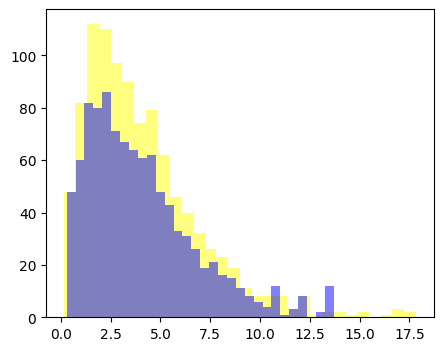

In [7]:
data2_01 = data2.quantile( 0.01 )
data2_99 = data2.quantile( 0.99 )
data2tr2 = data2.clip( data2_01, data2_99, axis=1 )
plt.figure( figsize = (5, 4) )
plt.hist( data2['F1'], bins=30, color='yellow', alpha=0.5)
plt.hist( data2tr2['F1'], bins=30, color='blue', alpha=0.5)

In [8]:
bin_bdr = [0, 2.5, 5.0, 7.5, float('inf')]
F1_bin = pd.cut( data2['F1'], bin_bdr, labels=False )
F1_bin

0      1
1      1
2      3
3      1
4      1
      ..
995    0
996    2
997    1
998    1
999    1
Name: F1, Length: 1000, dtype: int64

In [9]:
F2_rank = data2['F2'].rank()
F2_rank / data2.shape[0]

0      0.255
1      0.846
2      0.162
3      0.698
4      0.315
       ...  
995    0.020
996    0.906
997    0.203
998    0.317
999    0.361
Name: F2, Length: 1000, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,  11.,  26.,  38.,
         67.,  97., 119., 136., 134., 119.,  96.,  68.,  41.,  26.,   7.,
          3.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.19933758e+00, -4.85271508e+00, -4.50609257e+00, -4.15947007e+00,
        -3.81284756e+00, -3.46622506e+00, -3.11960255e+00, -2.77298004e+00,
        -2.42635754e+00, -2.07973503e+00, -1.73311253e+00, -1.38649002e+00,
        -1.03986752e+00, -6.93245011e-01, -3.46622505e-01,  4.89217555e-11,
         3.46622506e-01,  6.93245011e-01,  1.03986752e+00,  1.38649002e+00,
         1.73311253e+00,  2.07973503e+00,  2.42635754e+00,  2.77298004e+00,
         3.11960255e+00,  3.46622506e+00,  3.81284756e+00,  4.15947007e+00,
         4.50609257e+00,  4.85271508e+00,  5.19933758e+00]),
 <BarContainer object of 30 artists>)

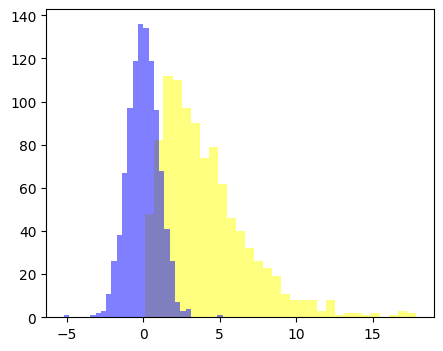

In [10]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer ( n_quantiles=100, output_distribution='normal' )
qt.fit( data2 )
data2tr3 = qt.transform( data2 )
plt.figure( figsize = (5, 4) )
plt.hist( data2['F1'], bins=30, color='yellow', alpha=0.5)
plt.hist( data2tr3[ :, 0 ], bins=30, color='blue', alpha=0.5)

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
city = { 'city': ['Seoul', 'Tokyo', 'Paris', 'Paris', 'Tokyo', 'Seoul',
'London', 'Madrid', 'Seoul', 'Beijing', 'London', 'Paris'] }
citydf = pd.DataFrame( city )
label_encoder = LabelEncoder()
citydf[ 'city_encoded' ] = label_encoder.fit_transform( citydf ['city'] )
citydf

,city,city_encoded
0,Seoul,4
1,Tokyo,5
2,Paris,3
3,Paris,3
4,Tokyo,5
5,Seoul,4
6,London,1
7,Madrid,2
8,Seoul,4
9,Beijing,0


In [12]:
one_hot_encoder = OneHotEncoder( sparse_output = False )
one_hot_encoded = one_hot_encoder.fit_transform( citydf[[ 'city' ]] )
pd.DataFrame( one_hot_encoded, columns = label_encoder.classes_)

,Beijing,London,Madrid,Paris,Seoul,Tokyo
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
freq = citydf['city'].value_counts()
freq

city
Seoul      3
Paris      3
Tokyo      2
London     2
Madrid     1
Beijing    1
Name: count, dtype: int64

In [14]:
citydf['city'].map( freq )

0     3
1     2
2     3
3     3
4     2
5     3
6     2
7     1
8     3
9     1
10    2
11    3
Name: city, dtype: int64

In [15]:
tgdict = {
'F1': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
'F2': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male'],
'Y' : [ 20, 50, 60, 80, 30, 50 ]
}
tgdf = pd.DataFrame( tgdict )

In [16]:
tg_mean = tgdf.groupby('F2')['Y'].mean()
tg_mean

F2
Female    25.0
Male      60.0
Name: Y, dtype: float64

In [17]:
tgdf['F3'] = tgdf['F2'].map( tg_mean )

In [18]:
# tgdf['F3'] = tgdf.groupby('F2')['Y'].transform('mean')

In [19]:
tgdf

,F1,F2,Y,F3
0,Alice,Female,20,25.0
1,Bob,Male,50,60.0
2,Charlie,Male,60,60.0
3,David,Male,80,60.0
4,Eve,Female,30,25.0
5,Frank,Male,50,60.0


2 Feature Selection

In [20]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20,
n_informative=8, n_redundant=12, random_state=1)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
skb = SelectKBest( f_classif )
# ============ SelectKBest parameter =================
# score_func
#      : f_regression, mutual_info_regression
#      : chi2, f_classif, mutual_info_classif
# k, percentile :    
skbfit = skb.fit( X, y )
dfscores = pd.DataFrame( skbfit.scores_ , columns=['score'] )
dfscores.sort_values('score', ascending=False )

,score
10,380.629147
15,253.048298
17,187.004679
13,153.136321
4,125.664978
14,99.579063
0,98.070020
9,92.021442
16,77.857707
19,66.274510


In [22]:
skb = SelectKBest( f_classif, k=5 )
skbfit = skb.fit( X, y )
skb.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False])

In [23]:
skb.transform(X).shape

(1000, 5)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE( model, n_features_to_select = 8, verbose = 1 )
# ============ RFE  parameter =================
# estimator : coef_  feature_importances_         sklearn          .
# n_features_to_select :                . default                .
# step :                   . default  1.
rfefit = rfe.fit( X, y )

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


In [25]:
rfefit.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True])

In [26]:
rfefit.transform(X).shape

(1000, 8)

In [27]:
from sklearn.feature_selection import RFECV
rfecv = RFECV( model, cv=5 )
rfecvfit = rfecv.fit(X, y)

In [28]:
rfecvfit.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True])

In [29]:
rfecvfit.transform(X).shape

(1000, 5)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier( n_neighbors=3 )
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
# ============ SequentialFeatureSelector parameter =================
# n_features_to_select :    .
# direction : 'forward'  'backward'
# scoring : . None  estimator  score .
sfsfit = sfs.fit(X, y)

In [31]:
sfsfit.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False])

In [32]:
sfsfit.transform(X).shape

(1000, 3)

In [33]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=123, max_depth=5 )
brtfs = BorutaPy( rf, n_estimators=7, max_iter=15, verbose=1,
random_state=123, alpha=0.01 )
# n_estimators :  iteration   estimator 
# max_iter :  iteration 
# alpha :  
np.int = np.int64
np.float = np.float64
np.bool = np.bool_
brtfs.fit( X, y )

Iteration: 1 / 15
Iteration: 2 / 15
Iteration: 3 / 15
Iteration: 4 / 15
Iteration: 5 / 15
Iteration: 6 / 15
Iteration: 7 / 15
Iteration: 8 / 15
Iteration: 9 / 15
Iteration: 10 / 15
Iteration: 11 / 15
Iteration: 12 / 15
Iteration: 13 / 15
Iteration: 14 / 15


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	8
Tentative: 	11
Rejected: 	1


BorutaPy(alpha=0.01,
         estimator=RandomForestClassifier(max_depth=5, n_estimators=7,
                                          random_state=RandomState(MT19937) at 0x124D21640),
         max_iter=15, n_estimators=7,
         random_state=RandomState(MT19937) at 0x124D21640, verbose=1)

In [34]:
brtfs.support_

array([False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False])

In [35]:
brtfs.transform(X).shape

(1000, 8)

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
selector = SelectFromModel(estimator=RandomForestClassifier())
# ============ SelectFromModel parameter =================
# threshold :    .
#       .
# 'mean'(default), 'median', '1.25*mean'    .
# max_features :      .
# importance_getter : 'auto'  estimator  coef_  feature_importances_  .
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [37]:
selector.get_support()

array([ True,  True, False, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False])

In [38]:
selector.transform(X).shape

(1000, 9)

In [39]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], random_state=1)

In [40]:
pd.Series(y).value_counts()

0    9853
1     147
Name: count, dtype: int64

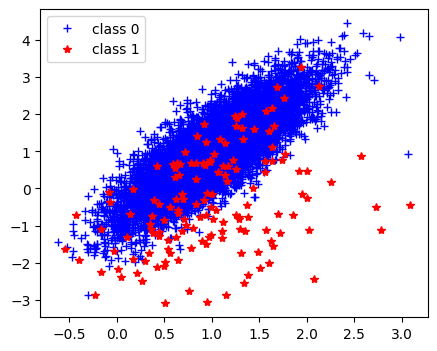

In [41]:
plt.figure(figsize=(5, 4))
plt.plot( X[y==0, 0], X[y==0, 1], 'b+', label="class 0" )
plt.plot( X[y==1, 0], X[y==1, 1], 'r*', label="class 1" )
plt.legend()

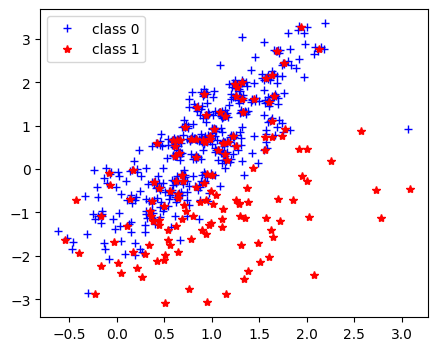

In [43]:
from imblearn.under_sampling import CondensedNearestNeighbour
undersample1 = CondensedNearestNeighbour(n_neighbors=1)
X1, y1 = undersample1.fit_resample(X, y)
plt.figure(figsize=(5, 4))
plt.plot( X1[y1==0, 0], X1[y1==0, 1], 'b+', label="class 0" )
plt.plot( X1[y1==1, 0], X1[y1==1, 1], 'r*', label="class 1" )
plt.legend()

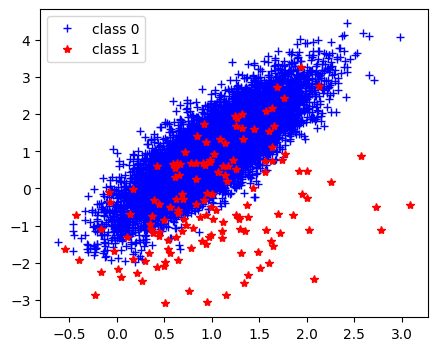

In [44]:
from imblearn.under_sampling import TomekLinks
undersample2 = TomekLinks()
X2, y2 = undersample2.fit_resample(X, y)
plt.figure(figsize=(5, 4))
plt.plot( X2[y2==0, 0], X2[y2==0, 1], 'b+', label="class 0" )
plt.plot( X2[y2==1, 0], X2[y2==1, 1], 'r*', label="class 1" )
plt.legend()

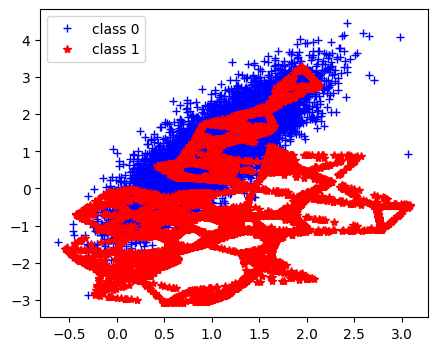

In [45]:
from imblearn.over_sampling import SMOTE
oversample1 = SMOTE()
OX1, Oy1 = oversample1.fit_resample(X, y)
plt.figure(figsize=(5, 4))
plt.plot( OX1[Oy1==0, 0], OX1[Oy1==0, 1], 'b+', label="class 0" )
plt.plot( OX1[Oy1==1, 0], OX1[Oy1==1, 1], 'r*', label="class 1" )
plt.legend()

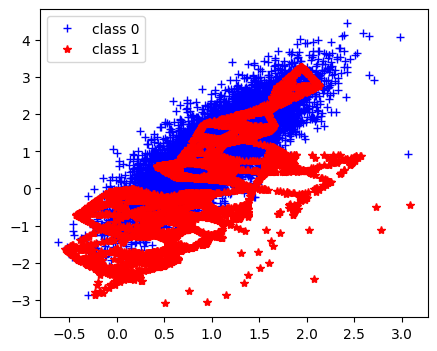

In [46]:
from imblearn.over_sampling import ADASYN
oversample2 = ADASYN()
OX2, Oy2 = oversample2.fit_resample(X, y)
plt.figure(figsize=(5, 4))
plt.plot( OX2[Oy2==0, 0], OX2[Oy2==0, 1], 'b+', label="class 0" )
plt.plot( OX2[Oy2==1, 0], OX2[Oy2==1, 1], 'r*', label="class 1" )
plt.legend()